1. **age** : Patient's Age in years (Numeric)
2. **sex** : Patient's Gender Male as 1 Female as 0 (Nominal)
3. **chest pain type** : Type of chest pain categorized into 1 typical, 2 typical angina, 3 non-anginal pain, 4 asymptomatic (Categorical)
4. **resting bp s** : Level of blood pressure at resting mode in mm/HG (Numerical)
5. **cholesterol** : Serum cholestrol in mg/dl (Numeric)
6. **fasting blood sugar** : Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false
7. **resting ecg** : Result of electrocardiogram while at rest are represented in 3 distinct values 0 : Normal 1: Abnormality in ST-T wave 2: Left ventricular hypertrophy
8. **max heart rate** : Maximum heart rate achieved (Numeric)
9. **exercise angina** : Angina induced by exercise 0 depicting NO 1 depicting Yes (Nominal)
10. **oldpeak** : Exercise induced ST-depression in comparison with the state of rest (Numeric)
11. **ST slope** : ST segment measured in terms of slope during peak exercise 0: Normal 1: Upsloping 2: Flat 3: Downsloping
- **target** : Heart Risk 1 means heart disease 0 means normal

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import seaborn as sns
import time

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
# loading the csv data to a Pandas DataFrame
df_master = pd.read_csv('./dataset/heart-statlog-cleveland-hungary.csv')

In [3]:
df_master.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [4]:
df_master.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [5]:
print(df_master.shape)

(1190, 12)


In [6]:
# checking the distribution of Target Variable
print("==========================")
print(df_master['target'].value_counts())

1    629
0    561
Name: target, dtype: int64


In [7]:
# checking for missing values
df_master.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

# Correlation Heatmap

In [8]:
corr = df_master.corr()
corr

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
age,1.000000,0.015096,0.149055,0.257692,-0.046472,0.178923,0.194595,-0.368676,0.188095,0.245093,0.237749,0.262029
sex,0.015096,1.000000,0.138405,-0.006443,-0.208441,0.110961,-0.022225,-0.181837,0.194380,0.096390,0.127913,0.311267
chest pain type,0.149055,0.138405,1.000000,0.009466,-0.109396,0.076492,0.035705,-0.337491,0.403428,0.224106,0.276949,0.460127
resting bp s,0.257692,-0.006443,0.009466,1.000000,0.099037,0.088235,0.095860,-0.101357,0.142435,0.176111,0.089384,0.121415
cholesterol,-0.046472,-0.208441,-0.109396,0.099037,1.000000,-0.239778,0.150879,0.238028,-0.033261,0.057451,-0.100053,-0.198366
fasting blood sugar,0.178923,0.110961,0.076492,0.088235,-0.239778,1.000000,0.032124,-0.118689,0.053053,0.031193,0.145902,0.216695
resting ecg,0.194595,-0.022225,0.035705,0.095860,0.150879,0.032124,1.000000,0.058812,0.037821,0.126023,0.093629,0.073059
max heart rate,-0.368676,-0.181837,-0.337491,-0.101357,0.238028,-0.118689,0.058812,1.000000,-0.377691,-0.183688,-0.350750,-0.413278
exercise angina,0.188095,0.194380,0.403428,0.142435,-0.033261,0.053053,0.037821,-0.377691,1.000000,0.370772,0.393408,0.481467
oldpeak,0.245093,0.096390,0.224106,0.176111,0.057451,0.031193,0.126023,-0.183688,0.370772,1.000000,0.524639,0.398385


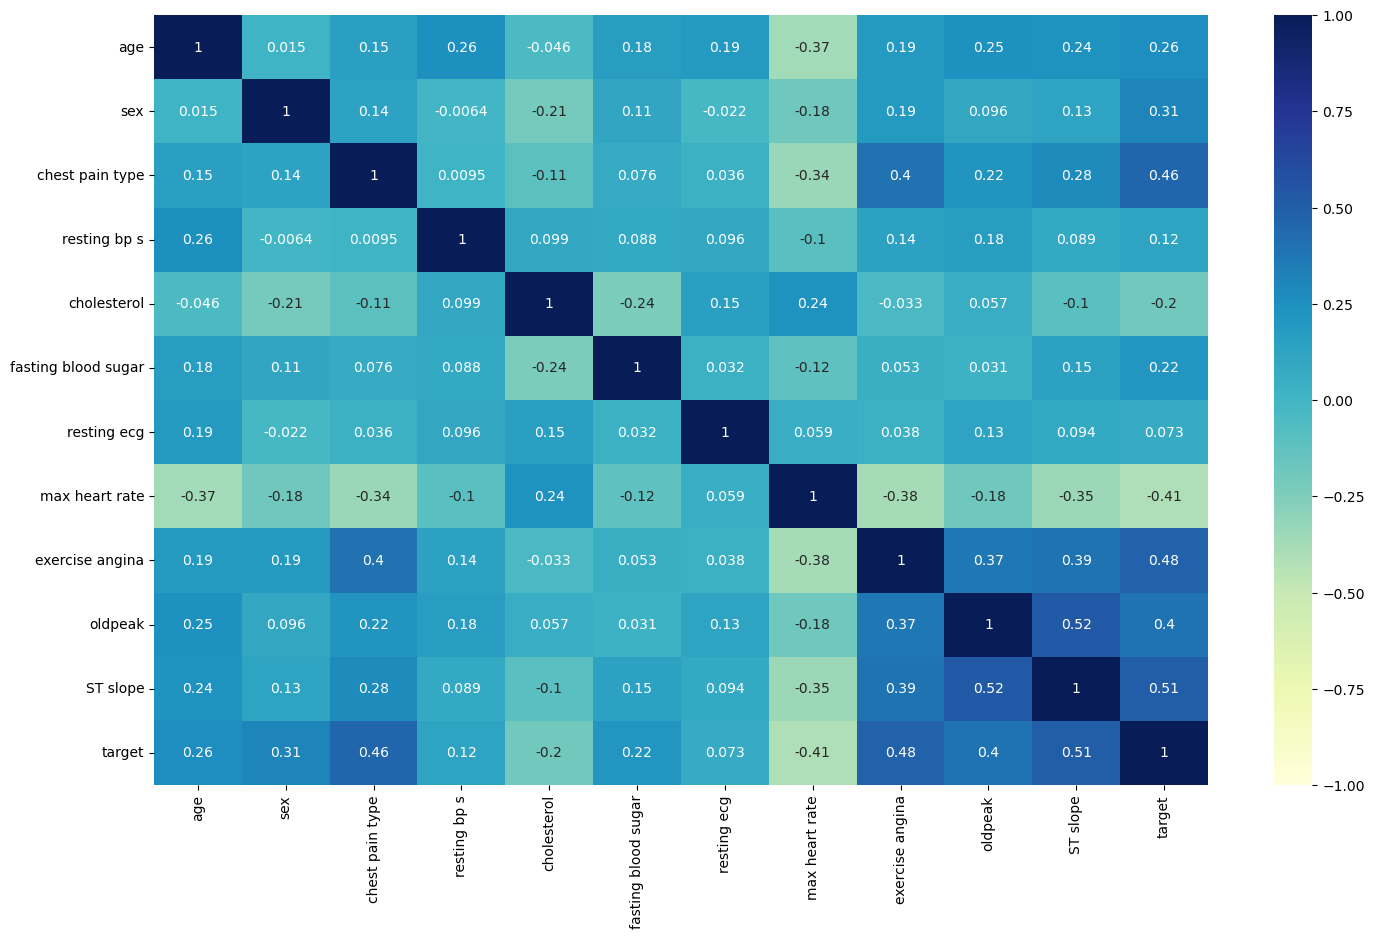

In [9]:
corr = df_master.corr()
plt.figure(figsize=(17,10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap="YlGnBu")
plt.show()

# Feature Importance

In [10]:
# creating seperate dataframes for visualization
df_eda = df_master.copy()

df_defective_heart = df_master[df_master['target']==1]
df_normal_heart = df_master[df_master['target']==0]

In [11]:
pd.options.mode.chained_assignment = None
df_eda['sex'][df_eda['sex'] == 0] = 'Female'
df_eda['sex'][df_eda['sex'] == 1] = 'Male' 

## ==============  Heart Condition (Target) vs Age (Feature) ==============

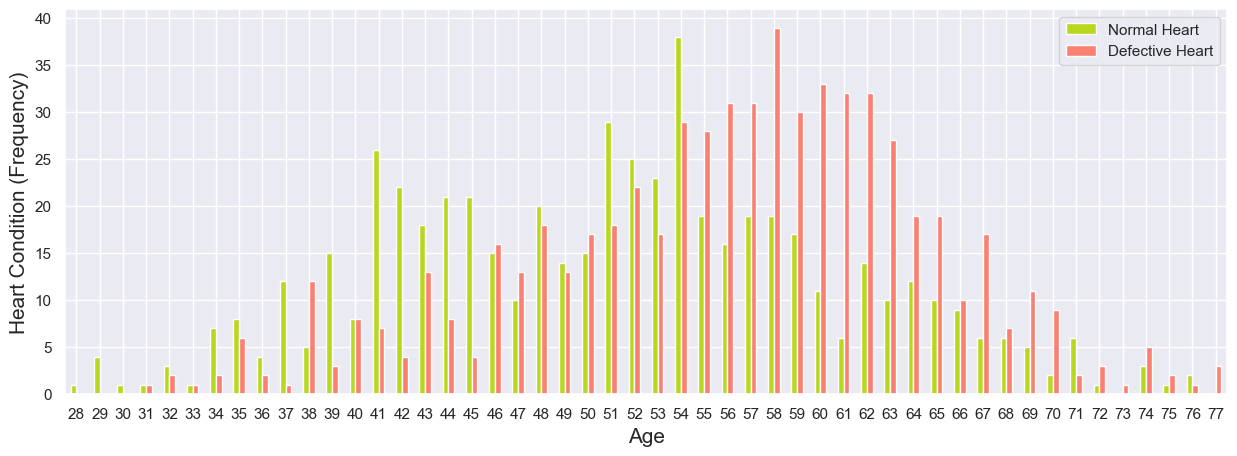

In [12]:
sns.set(style="darkgrid")
pd.crosstab(df_eda['age'], df_eda['target']).plot(kind="bar",figsize=(15,5),color=['#BAD720','salmon'])
plt.xlabel('Age',fontsize=15)
plt.xticks(rotation=0)
plt.ylabel('Heart Condition (Frequency)',fontsize=15)
plt.legend(["Normal Heart", "Defective Heart"])
plt.show()

### As the age of patient increases, likelihood of having heart disease also increases.

## ============ Max Heart Rate (Feature) vs Heart Condition (Target) ============

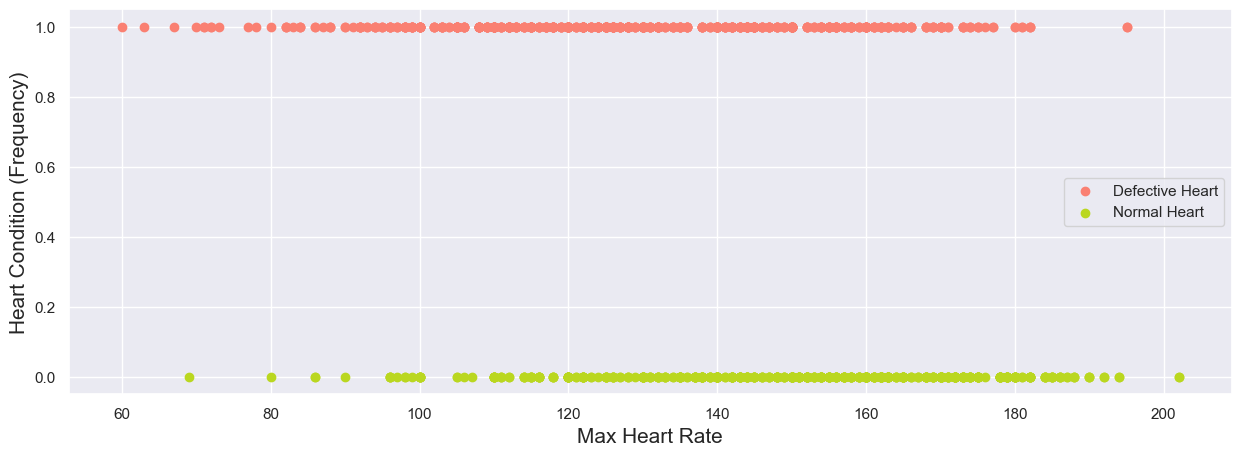

In [13]:
sns.set(style="darkgrid")
plt.scatter(df_defective_heart['max heart rate'], df_defective_heart['target'], color='salmon', label='Defective Heart')
plt.scatter(df_normal_heart['max heart rate'], df_normal_heart['target'], color='#BAD720', label='Normal Heart')
plt.xlabel('Max Heart Rate', fontsize=15)
plt.ylabel('Heart Condition (Frequency)', fontsize=15)
plt.legend()
plt.gcf().set_size_inches((15, 5))    

## ============ Age (Feature) vs Cholesterol (Feature) ============

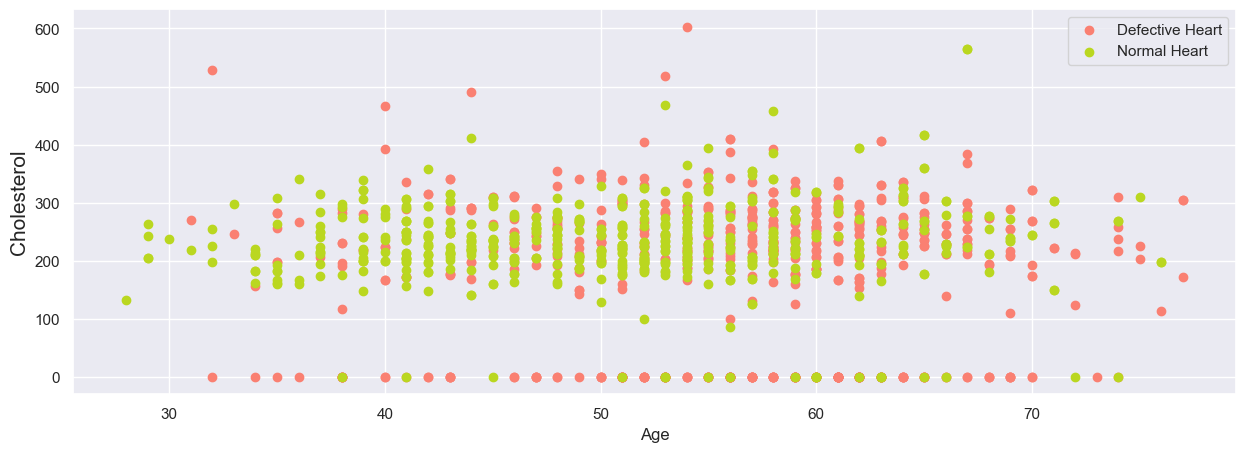

In [14]:
sns.set(style="darkgrid")
plt.scatter(df_defective_heart['age'], df_defective_heart['cholesterol'], color='salmon', label='Defective Heart')
plt.scatter(df_normal_heart['age'], df_normal_heart['cholesterol'], color='#BAD720', label='Normal Heart')
plt.xlabel('Age')
plt.ylabel('Cholesterol', fontsize=15)
plt.legend()
plt.gcf().set_size_inches((15, 5))    

## ============ Age (Feature) vs Resting Blood Pressure (Feature) ============

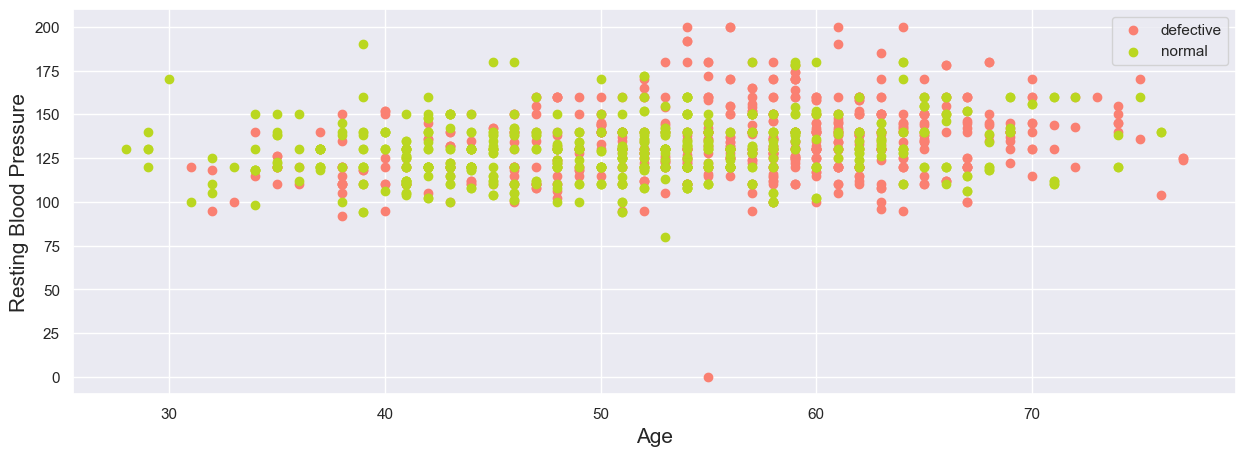

In [15]:
sns.set(style="darkgrid")
plt.scatter(df_defective_heart['age'], df_defective_heart['resting bp s'], color='salmon', label='defective')
plt.scatter(df_normal_heart['age'], df_normal_heart['resting bp s'], color='#BAD720', label='normal')
plt.xlabel('Age', fontsize=15)
plt.ylabel('Resting Blood Pressure', fontsize=15)
plt.legend()
plt.gcf().set_size_inches((15, 5))    

## Relationships between important features

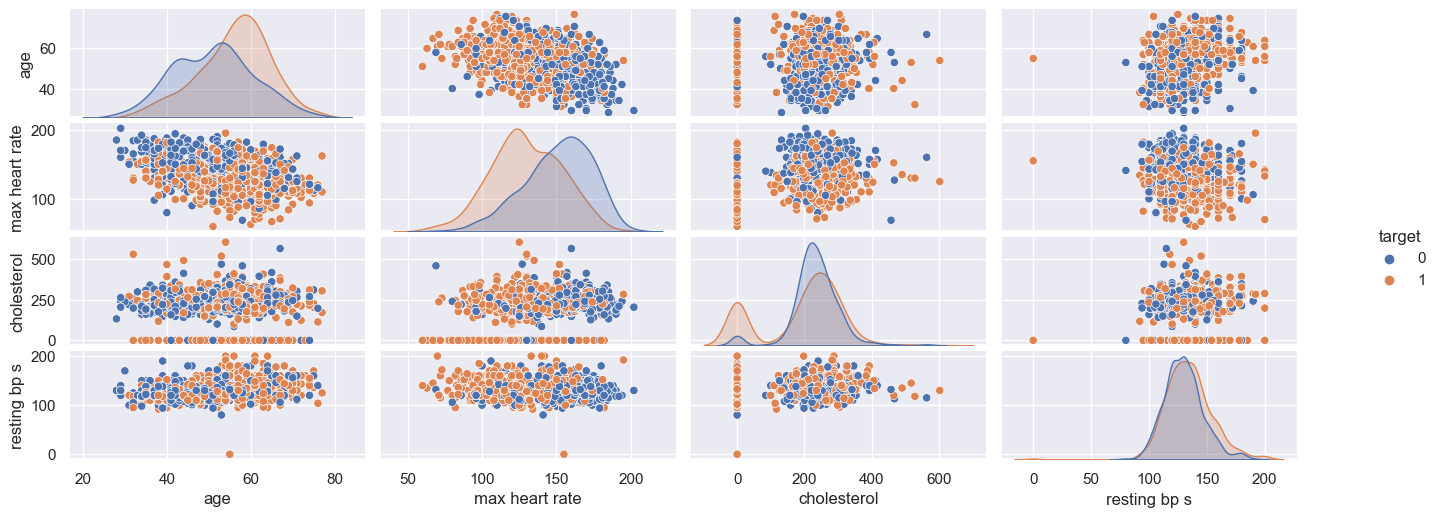

In [16]:
sns.set(style="darkgrid")
sns.pairplot(df_master[['age','max heart rate','cholesterol','resting bp s']+['target']], hue='target', height=2)
plt.gcf().set_size_inches((15, 5))  

plt.savefig('./plots/rel-features.png', bbox_inches='tight', dpi=150)

# Principal Component Analysis (PCA)

In [17]:
df_pca = df_master.copy()
X = df_pca.drop(['target'], axis=1)
y = df_pca['target']

In [18]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

### Covariance Matrix

In [19]:
print('Numpy covariance matrix: \n%s' %np.cov(X_std.T))

Numpy covariance matrix: 
[[ 1.00084104  0.01510842  0.14918037  0.25790886 -0.04651141  0.17907367
   0.19475916 -0.36898599  0.18825314  0.24529954  0.23794898]
 [ 0.01510842  1.00084104  0.13852144 -0.00644823 -0.20861623  0.11105478
  -0.02224383 -0.18198959  0.19454368  0.09647113  0.12802058]
 [ 0.14918037  0.13852144  1.00084104  0.00947391 -0.10948783  0.07655618
   0.03573499 -0.33777487  0.40376703  0.22429496  0.27718153]
 [ 0.25790886 -0.00644823  0.00947391  1.00084104  0.09912066  0.08830908
   0.09594038 -0.10144215  0.14255481  0.17625873  0.08945959]
 [-0.04651141 -0.20861623 -0.10948783  0.09912066  1.00084104 -0.23997957
   0.1510061   0.23822787 -0.03328873  0.05749964 -0.10013696]
 [ 0.17907367  0.11105478  0.07655618  0.08830908 -0.23997957  1.00084104
   0.03215076 -0.11878877  0.05309719  0.03121932  0.14602488]
 [ 0.19475916 -0.02224383  0.03573499  0.09594038  0.1510061   0.03215076
   1.00084104  0.0588619   0.03785252  0.12612906  0.09370737]
 [-0.36898599 -

### Eigen Values and Eigen Vectors

In [20]:
# Perform eigendecomposition on covariance matrix
cov_mat = np.cov(X_std.T)
eig_values, eig_vectors = np.linalg.eig(cov_mat)
print('Eigenvectors \n%s' %eig_vectors)
print('\nEigenvectors \n%s' %eig_values)

Eigenvectors 
[[ 0.32208483  0.19762178  0.44074833 -0.29574316  0.36732128 -0.32207036
   0.29799485  0.35484817 -0.21282378 -0.24682707 -0.12607112]
 [ 0.19221417 -0.34482911 -0.06084508 -0.07000804 -0.06821754 -0.16542042
   0.23575142  0.21499619  0.39230005  0.5643495  -0.47888831]
 [ 0.34559802 -0.11845353 -0.27220755 -0.06306527 -0.15221099 -0.52367598
  -0.1448643  -0.52082188 -0.0370549  -0.34844138 -0.2757287 ]
 [ 0.16891081  0.34622318  0.36960074 -0.0429887  -0.18820834 -0.01828847
  -0.40590638 -0.22379552 -0.37619255  0.54485136 -0.15543743]
 [-0.13207383  0.58530407 -0.24202458  0.00245358 -0.25054555  0.01548725
   0.66946805 -0.21058777 -0.05618478  0.08541943 -0.12406821]
 [ 0.16847037 -0.22823158  0.57647497  0.13721343 -0.01929525  0.08702498
   0.3417315  -0.52575573  0.27735733  0.02441114  0.29951463]
 [ 0.08578423  0.4309386   0.21189878  0.11928364 -0.0880827   0.22799366
  -0.27627281  0.06713961  0.61281168 -0.31619733 -0.36291919]
 [-0.40073389  0.20566162 -

In [21]:
# Visually confirm that the list is correctly sorted by descreasing eigenvalues
eig_pairs = [(np.abs(eig_values[i]), eig_vectors[:,i]) for i in range(len(eig_values))]
print('Eigenvalues in descending order: ')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order: 
2.7745146311469604
1.4915838191985733
1.1932178822466175
0.3988877265636466
0.49964053392711105
0.5546488515023217
0.6324690603097274
0.7633466835494945
0.9520856013088879
0.8868041557961281
0.8620525262755889


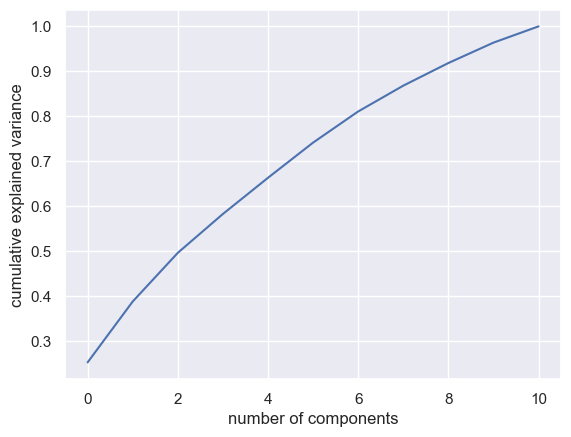

In [22]:
# Explained variance
pca = PCA().fit(X_std)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [23]:
pca = PCA(n_components=10)
x_pca = pca.fit_transform(X_std)
print(pca.explained_variance_ratio_)

[0.25201665 0.13548458 0.1083832  0.0864805  0.08055081 0.07830256
 0.06933684 0.05744887 0.05038025 0.0453837 ]


In [24]:
0.25201665+0.13548458+0.1083832+0.0864805+0.08055081+0.07830256+0.06933684+0.05744887+0.05038025+0.0453837 

0.96376796

In [25]:
x_pca.shape

(1190, 10)

In [26]:
pca.components_

array([[ 0.32208483,  0.19221417,  0.34559802,  0.16891081, -0.13207383,
         0.16847037,  0.08578423, -0.40073389,  0.41594829,  0.37563356,
         0.42832269],
       [ 0.19762178, -0.34482911, -0.11845353,  0.34622318,  0.58530407,
        -0.22823158,  0.4309386 ,  0.20566162,  0.02333841,  0.28261801,
         0.07102028],
       [ 0.44074833, -0.06084508, -0.27220755,  0.36960074, -0.24202458,
         0.57647497,  0.21189878, -0.04679034, -0.29648886, -0.21061615,
        -0.14519851],
       [ 0.21282378, -0.39230005,  0.0370549 ,  0.37619255,  0.05618478,
        -0.27735733, -0.61281168, -0.36635575,  0.07737877, -0.17359355,
        -0.17875152],
       [ 0.24682707, -0.5643495 ,  0.34844138, -0.54485136, -0.08541943,
        -0.02441114,  0.31619733, -0.21012494, -0.0788219 , -0.20939179,
        -0.0151061 ],
       [-0.12607112, -0.47888831, -0.2757287 , -0.15543743, -0.12406821,
         0.29951463, -0.36291919,  0.1709281 , -0.14148736,  0.40444262,
         0.452

Text(0, 0.5, 'Second Principal Component')

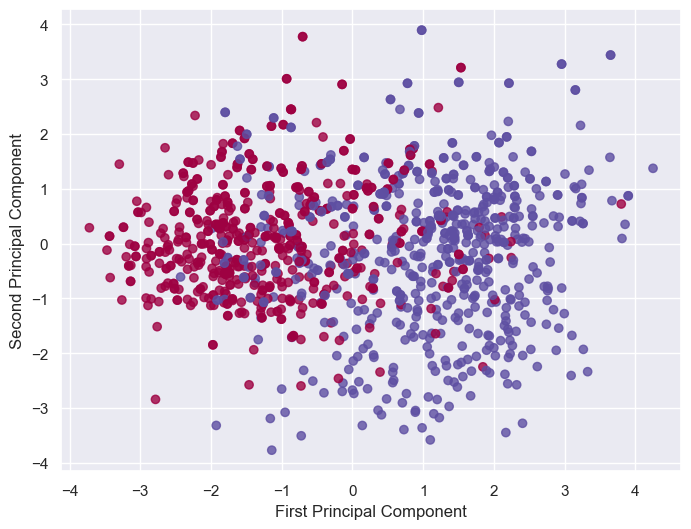

In [27]:
plt.figure(figsize=(8,6))

plt.scatter(x_pca[:,0], x_pca[:,1], c=df_pca['target'], alpha=0.8, cmap=plt.colormaps.get_cmap('Spectral'))

plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')

# =================== Version 1 ===================

### Splitting the Features and Target

In [28]:
# X = features, Y = targets
X = df_master.drop(columns=['resting ecg', 'target'], axis=1)
y = df_master['target']

### Splitting the Dataset for Training and Testing

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(1190, 10) (952, 10) (238, 10)


In [31]:
raw_model_accuracies = {
    'Logistic Regression': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Random Forest': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Decision Tree': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'KNN': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'SVM': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Naive Bayes': {
        'Accuracy':  '',
        'Training time': '' 
    },
}


In [32]:
ten_fold_cross_val_accuracies = {
    'Logistic Regression': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Random Forest': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Decision Tree': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'KNN': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'SVM': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Naive Bayes': {
        'Accuracy':  '',
        'Training time': '' 
    },
}

In [33]:
five_fold_cross_val_accuracies = {
    'Logistic Regression': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Random Forest': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Decision Tree': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'KNN': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'SVM': {
        'Accuracy':  '',
        'Training time': '' 
    },
    'Naive Bayes': {
        'Accuracy':  '',
        'Training time': '' 
    },
}

In [34]:
ten_fold_cross_val_accuracies_plot = {}
five_fold_cross_val_accuracies_plot = {}

## =================== Logistic Regression ==================

### Hyperparameter Tuning (GridSearchCV) (Logistic Regression)

In [35]:
clf = GridSearchCV(LogisticRegression(max_iter=10000), {
    'solver': ['lbfgs', 'liblinear', 'sag', 'saga']
}, cv=5, return_train_score=False)

clf.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=10000),
             param_grid={'solver': ['lbfgs', 'liblinear', 'sag', 'saga']})

In [36]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.076865,0.015099,0.002250,0.000535,lbfgs,{'solver': 'lbfgs'},0.852941,0.823529,0.857143,0.768908,0.794118,0.819328,0.033927,1
1,0.003704,0.000401,0.001454,0.000563,liblinear,{'solver': 'liblinear'},0.848739,0.819328,0.857143,0.764706,0.773109,0.812605,0.037918,2
2,0.397612,0.037817,0.001519,0.000434,sag,{'solver': 'sag'},0.844538,0.823529,0.848739,0.768908,0.756303,0.808403,0.038564,3
3,0.507458,0.057919,0.001600,0.000488,saga,{'solver': 'saga'},0.844538,0.815126,0.852941,0.752101,0.764706,0.805882,0.040944,4


In [37]:

df[['param_solver', 'mean_test_score']]

,param_solver,mean_test_score
0,lbfgs,0.819328
1,liblinear,0.812605
2,sag,0.808403
3,saga,0.805882


In [38]:
clf.best_params_

{'solver': 'lbfgs'}

### Model Training (Logistic Regression)

In [39]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)

start = time.time()
lr.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['Logistic Regression']['Accuracy'] = f"{round((lr.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['Logistic Regression']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (Logistic Regression)

In [40]:
y_train_pred = lr.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  84%


In [41]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.83      0.83      0.83       451
           1       0.85      0.85      0.85       501

    accuracy                           0.84       952
   macro avg       0.84      0.84      0.84       952
weighted avg       0.84      0.84      0.84       952



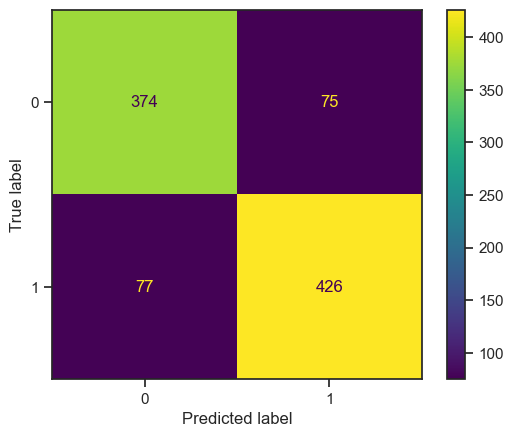

In [42]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(lr, X_train, y_train)
plt.show()

### Testing Accuracy (Logistic Regression)

In [43]:
y_test_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  82%


In [44]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       126
           1       0.78      0.88      0.82       112

    accuracy                           0.82       238
   macro avg       0.83      0.83      0.82       238
weighted avg       0.83      0.82      0.82       238



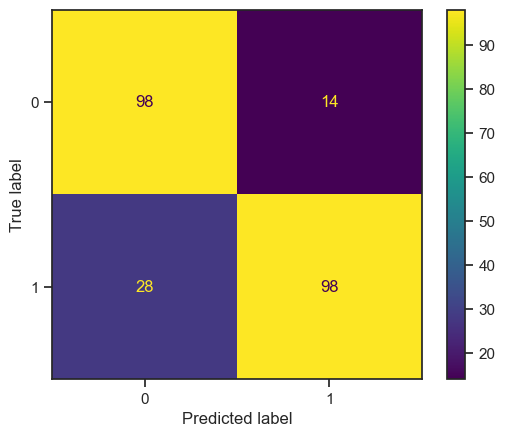

In [45]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test)
plt.show()

### Corss Validation (Logistic Regression) 

#### ========== 10-fold cross validation ==========

In [46]:
start = time.time()
cross_val_acc = cross_val_score(estimator=lr, X=X, y=y, cv=10)
stop = time.time()

In [47]:
print(cross_val_acc*100)

[80.67226891 89.91596639 87.39495798 75.6302521  84.03361345 88.23529412
 77.31092437 77.31092437 79.83193277 79.83193277]


In [48]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  82%


In [49]:
ten_fold_cross_val_accuracies['Logistic Regression']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['Logistic Regression']['Training time'] = f"{round((stop - start), 3)}s"

In [50]:
ten_fold_cross_val_accuracies_plot['Logistic Regression'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [51]:
start = time.time()
cross_val_acc = cross_val_score(estimator=lr, X=X, y=y, cv=5)
stop = time.time()

In [52]:
print(cross_val_acc*100)

[85.29411765 82.35294118 85.71428571 76.8907563  79.41176471]


In [53]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  82%


In [54]:
five_fold_cross_val_accuracies['Logistic Regression']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['Logistic Regression']['Training time'] = f"{round((stop - start), 3)}s"

In [55]:
five_fold_cross_val_accuracies_plot['Logistic Regression'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (Logistic Regression)

In [56]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': lr.coef_[0]
})
importances

,Attribute,Importance
0,age,0.020108
1,sex,1.396181
2,chest pain type,0.743938
3,resting bp s,0.011806
4,cholesterol,-0.003286
5,fasting blood sugar,0.747169
6,max heart rate,-0.010386
7,exercise angina,1.011593
8,oldpeak,0.410110
9,ST slope,1.137573


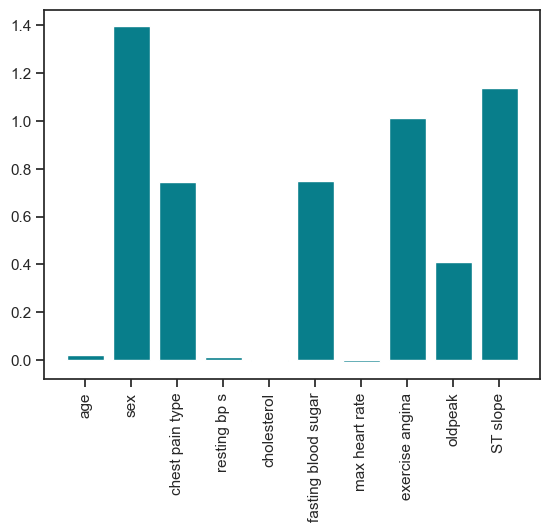

In [57]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## =================== Randmon Forest ==================

### Hyperparameter Tuning (GridSearchCV) (Random Forest)

In [58]:
clf = GridSearchCV(RandomForestClassifier(random_state=42), {
    'n_estimators': [200, 500, 1000],
    'max_features': ['sqrt', 'log2']
}, cv=5, return_train_score=False)

clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 500, 1000]})

In [59]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.320066,0.003100,0.019535,0.000322,sqrt,200,"{'max_features': 'sqrt', 'n_estimators': 200}",0.903361,0.886555,0.966387,0.941176,0.962185,0.931933,0.031822,3
1,0.789477,0.007020,0.045664,0.000961,sqrt,500,"{'max_features': 'sqrt', 'n_estimators': 500}",0.907563,0.882353,0.966387,0.941176,0.962185,0.931933,0.032372,3
2,1.581998,0.026321,0.092025,0.002727,sqrt,1000,"{'max_features': 'sqrt', 'n_estimators': 1000}",0.907563,0.878151,0.966387,0.949580,0.962185,0.932773,0.034341,1
3,0.316272,0.002010,0.019190,0.000984,log2,200,"{'max_features': 'log2', 'n_estimators': 200}",0.903361,0.886555,0.966387,0.941176,0.962185,0.931933,0.031822,3
4,0.786885,0.011077,0.045693,0.001496,log2,500,"{'max_features': 'log2', 'n_estimators': 500}",0.907563,0.882353,0.966387,0.941176,0.962185,0.931933,0.032372,3
5,1.773842,0.370511,0.091139,0.003311,log2,1000,"{'max_features': 'log2', 'n_estimators': 1000}",0.907563,0.878151,0.966387,0.949580,0.962185,0.932773,0.034341,1


In [60]:
print(df[['params', 'mean_test_score']])

                                           params  mean_test_score
0   {'max_features': 'sqrt', 'n_estimators': 200}         0.931933
1   {'max_features': 'sqrt', 'n_estimators': 500}         0.931933
2  {'max_features': 'sqrt', 'n_estimators': 1000}         0.932773
3   {'max_features': 'log2', 'n_estimators': 200}         0.931933
4   {'max_features': 'log2', 'n_estimators': 500}         0.931933
5  {'max_features': 'log2', 'n_estimators': 1000}         0.932773


In [61]:
clf.best_params_

{'max_features': 'sqrt', 'n_estimators': 1000}

### Model Training (Radmon Forest)

In [62]:
rf = RandomForestClassifier(n_estimators=500, max_features='sqrt', random_state=42)

start = time.time()
rf.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['Random Forest']['Accuracy'] = f"{round((rf.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['Random Forest']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (Radmon Forest)

In [63]:
y_train_pred = rf.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  100%


In [64]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       503

    accuracy                           1.00       952
   macro avg       1.00      1.00      1.00       952
weighted avg       1.00      1.00      1.00       952



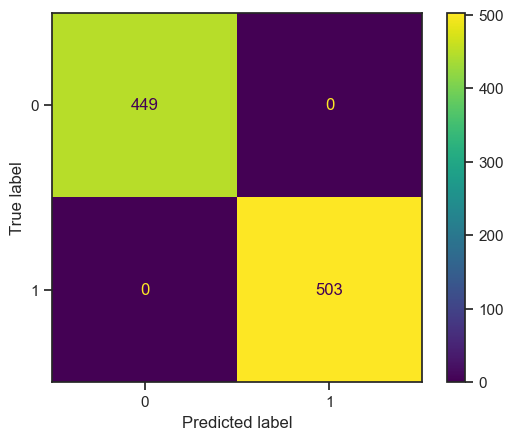

In [65]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train)
plt.show()

### Testing Accuracy (Radmon Forest)

In [66]:
y_test_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  92%


In [67]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       114
           1       0.92      0.94      0.93       124

    accuracy                           0.92       238
   macro avg       0.92      0.92      0.92       238
weighted avg       0.92      0.92      0.92       238



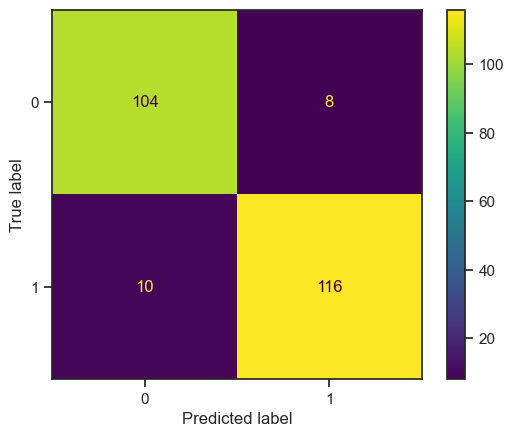

In [68]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test)
plt.show()

### Corss Validation (Random Forest)

#### ========== 10-fold cross validation ==========

In [69]:
start = time.time()
cross_val_acc = cross_val_score(estimator=rf, X=X, y=y, cv=10)
stop = time.time()

In [70]:
print(cross_val_acc*100)

[ 87.39495798  94.11764706  89.91596639  79.83193277  95.79831933
 100.         100.          93.27731092 100.          93.27731092]


In [71]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  93%


In [72]:
ten_fold_cross_val_accuracies['Random Forest']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['Random Forest']['Training time'] = f"{round((stop - start), 3)}s"

In [73]:
ten_fold_cross_val_accuracies_plot['Random Forest'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [74]:
start = time.time()
cross_val_acc = cross_val_score(estimator=rf, X=X, y=y, cv=5)
stop = time.time()

In [75]:
print(cross_val_acc*100)

[90.75630252 88.23529412 96.63865546 94.11764706 96.21848739]


In [76]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  93%


In [77]:
five_fold_cross_val_accuracies['Random Forest']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['Random Forest']['Training time'] = f"{round((stop - start), 3)}s"

In [78]:
five_fold_cross_val_accuracies_plot['Random Forest'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (Random Forest)

In [79]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf.feature_importances_
})
importances

,Attribute,Importance
0,age,0.090970
1,sex,0.045521
2,chest pain type,0.133476
3,resting bp s,0.089831
4,cholesterol,0.108269
5,fasting blood sugar,0.019093
6,max heart rate,0.126398
7,exercise angina,0.083566
8,oldpeak,0.113267
9,ST slope,0.189609


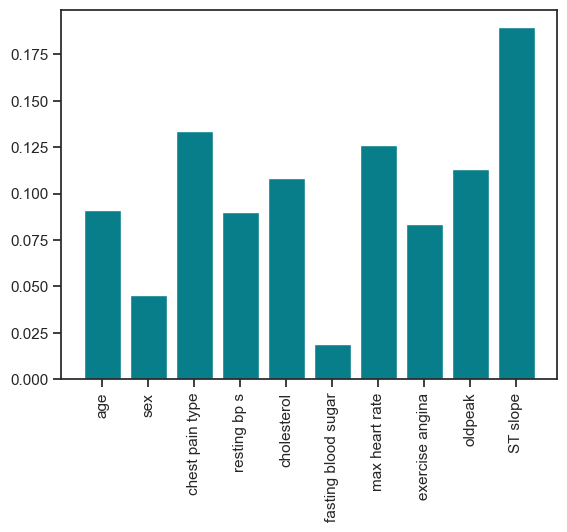

In [80]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## =================== Decision Tree ==================

### Hyperparameter Tuning (GridSearchCV) (Decision Tree)

In [81]:
clf = GridSearchCV(DecisionTreeClassifier(random_state=1024), {
    'splitter': ['best', 'random'],
    'max_features': ['sqrt', 'log2'],
    'criterion': ['gini', 'entropy', 'log_loss']
}, cv=5, return_train_score=False)

clf.fit(X, y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2'],
                         'splitter': ['best', 'random']})

In [82]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_features,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002657,0.000672,0.001237,0.000465,gini,sqrt,best,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.768908,0.785714,0.869748,0.92437,0.949580,0.859664,0.072220,11
1,0.001922,0.000398,0.000948,0.000505,gini,sqrt,random,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.819328,0.806723,0.936975,0.92437,0.962185,0.889916,0.064075,5
2,0.002309,0.000398,0.001499,0.000415,gini,log2,best,"{'criterion': 'gini', 'max_features': 'log2', ...",0.768908,0.785714,0.869748,0.92437,0.949580,0.859664,0.072220,11
3,0.001961,0.000520,0.001159,0.000630,gini,log2,random,"{'criterion': 'gini', 'max_features': 'log2', ...",0.819328,0.806723,0.936975,0.92437,0.962185,0.889916,0.064075,5
4,0.002667,0.000710,0.001241,0.000384,entropy,sqrt,best,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.819328,0.836134,0.894958,0.94958,0.957983,0.891597,0.056709,1
5,0.002030,0.000034,0.001281,0.000418,entropy,sqrt,random,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.823529,0.827731,0.911765,0.92437,0.949580,0.887395,0.051897,7
6,0.002267,0.000389,0.001082,0.000162,entropy,log2,best,"{'criterion': 'entropy', 'max_features': 'log2...",0.819328,0.836134,0.894958,0.94958,0.957983,0.891597,0.056709,1
7,0.002131,0.000872,0.001177,0.000220,entropy,log2,random,"{'criterion': 'entropy', 'max_features': 'log2...",0.823529,0.827731,0.911765,0.92437,0.949580,0.887395,0.051897,7
8,0.002586,0.000630,0.000908,0.000199,log_loss,sqrt,best,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.819328,0.836134,0.894958,0.94958,0.957983,0.891597,0.056709,1
9,0.002825,0.000352,0.000906,0.000376,log_loss,sqrt,random,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.823529,0.827731,0.911765,0.92437,0.949580,0.887395,0.051897,7


In [83]:
df[['params', 'mean_test_score']]

,params,mean_test_score
0,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.859664
1,"{'criterion': 'gini', 'max_features': 'sqrt', ...",0.889916
2,"{'criterion': 'gini', 'max_features': 'log2', ...",0.859664
3,"{'criterion': 'gini', 'max_features': 'log2', ...",0.889916
4,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.891597
5,"{'criterion': 'entropy', 'max_features': 'sqrt...",0.887395
6,"{'criterion': 'entropy', 'max_features': 'log2...",0.891597
7,"{'criterion': 'entropy', 'max_features': 'log2...",0.887395
8,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.891597
9,"{'criterion': 'log_loss', 'max_features': 'sqr...",0.887395


In [84]:
clf.best_params_

{'criterion': 'entropy', 'max_features': 'sqrt', 'splitter': 'best'}

### Model Training (Decision Tree)

In [85]:
dtc = DecisionTreeClassifier(criterion='entropy', max_features='sqrt', splitter='random')

start = time.time()
dtc.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['Decision Tree']['Accuracy'] = f"{round((dtc.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['Decision Tree']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (Decision Tree)

In [86]:
y_train_pred = dtc.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  100%


In [87]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       449
           1       1.00      1.00      1.00       503

    accuracy                           1.00       952
   macro avg       1.00      1.00      1.00       952
weighted avg       1.00      1.00      1.00       952



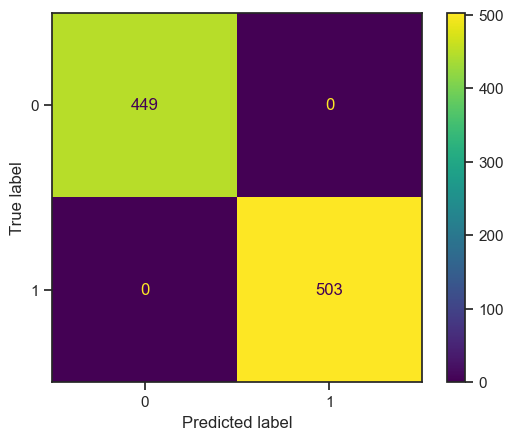

In [88]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(dtc, X_train, y_train)
plt.show()

### Testing Accuracy (Decision Tree)

In [89]:
y_test_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  89%


In [90]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.89      0.88      0.88       114
           1       0.89      0.90      0.90       124

    accuracy                           0.89       238
   macro avg       0.89      0.89      0.89       238
weighted avg       0.89      0.89      0.89       238



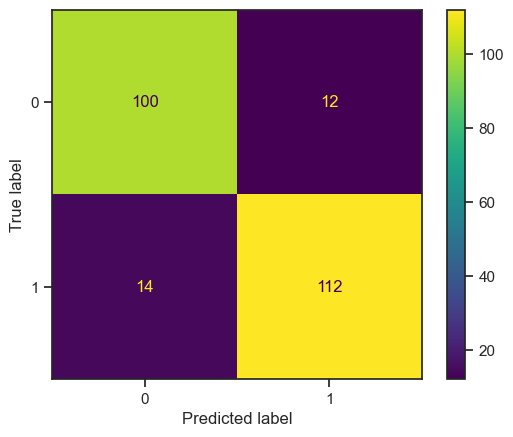

In [91]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(dtc, X_test, y_test)
plt.show()

### Cross Validation (Decision Tree)

#### ========== 10-fold cross validation ==========

In [92]:
start = time.time()
cross_val_acc = cross_val_score(estimator=dtc, X=X, y=y, cv=10)
stop = time.time()

In [93]:
print(cross_val_acc*100)

[ 73.1092437   93.27731092  80.67226891  78.1512605   84.03361345
  90.75630252 100.          94.95798319  99.15966387  92.43697479]


In [94]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  89%


In [95]:
ten_fold_cross_val_accuracies['Decision Tree']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['Decision Tree']['Training time'] = f"{round((stop - start), 3)}s"

In [96]:
ten_fold_cross_val_accuracies_plot['Decision Tree'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [97]:
start = time.time()
cross_val_acc = cross_val_score(estimator=dtc, X=X, y=y, cv=5)
stop = time.time()

In [98]:
print(cross_val_acc*100)

[79.83193277 80.25210084 91.17647059 88.23529412 95.79831933]


In [99]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  87%


In [100]:
five_fold_cross_val_accuracies['Decision Tree']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['Decision Tree']['Training time'] = f"{round((stop - start), 3)}s"

In [101]:
five_fold_cross_val_accuracies_plot['Decision Tree'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (Decision Tree)

In [102]:
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': dtc.feature_importances_
})
importances

,Attribute,Importance
0,age,0.099256
1,sex,0.048032
2,chest pain type,0.113782
3,resting bp s,0.087437
4,cholesterol,0.118264
5,fasting blood sugar,0.031301
6,max heart rate,0.163737
7,exercise angina,0.098124
8,oldpeak,0.127836
9,ST slope,0.112230


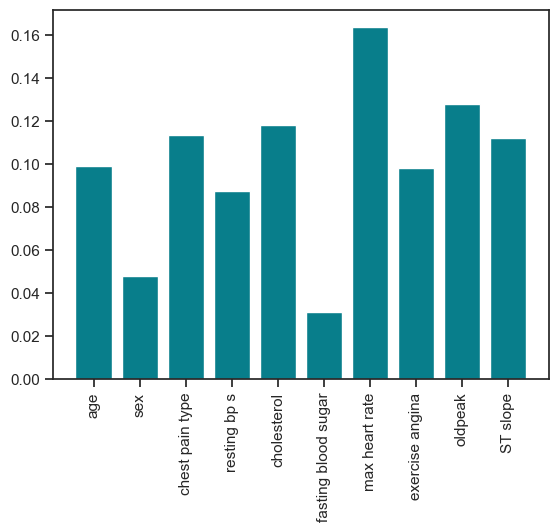

In [103]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## =================== KNN ==================

### Model Training (KNN)

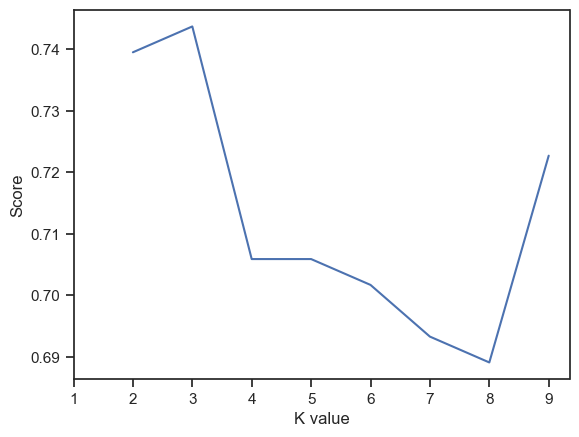

In [104]:
# try ro find best k value
scoreList = []
for i in range(2,10):
    knn = KNeighborsClassifier(n_neighbors = i)  
    knn.fit(X_train, y_train)
    scoreList.append(knn.score(X_test, y_test))
    
plt.plot(range(2,10), scoreList)
plt.xticks(np.arange(1,10,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()

In [105]:
knn = KNeighborsClassifier(n_neighbors = 3) 

start = time.time()
knn.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['KNN']['Accuracy'] = f"{round((knn.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['KNN']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (KNN)

In [106]:
y_train_pred = knn.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  86%


In [107]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85       435
           1       0.88      0.86      0.87       517

    accuracy                           0.86       952
   macro avg       0.86      0.86      0.86       952
weighted avg       0.86      0.86      0.86       952



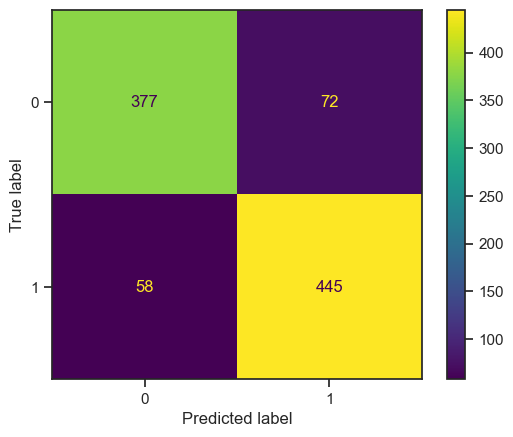

In [108]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(knn, X_train, y_train)
plt.show()

### Testing Accuracy (KNN)

In [109]:
y_test_pred = knn.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  74%


In [110]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74       121
           1       0.72      0.78      0.75       117

    accuracy                           0.74       238
   macro avg       0.75      0.74      0.74       238
weighted avg       0.75      0.74      0.74       238



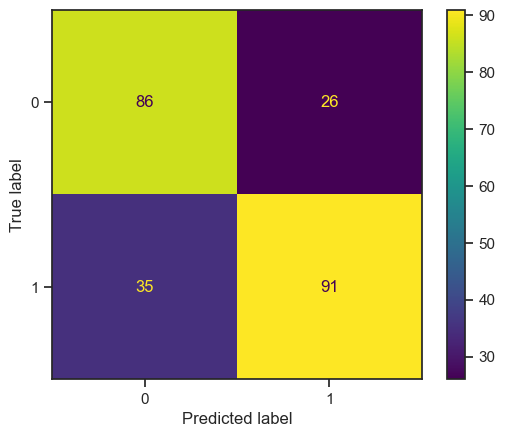

In [111]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test)
plt.show()

### Cross Validation (KNN)

#### ========== 10-fold cross validation ==========

In [112]:
start = time.time()
cross_val_acc = cross_val_score(estimator=knn, X=X, y=y, cv=10)
stop = time.time()

In [113]:
print(cross_val_acc*100)

[59.66386555 67.22689076 73.94957983 63.02521008 74.78991597 81.51260504
 72.26890756 68.90756303 71.42857143 68.90756303]


In [114]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  70%


In [115]:
ten_fold_cross_val_accuracies['KNN']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['KNN']['Training time'] = f"{round((stop - start), 3)}s"

In [116]:
ten_fold_cross_val_accuracies_plot['KNN'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [117]:
start = time.time()
cross_val_acc = cross_val_score(estimator=knn, X=X, y=y, cv=5)
stop = time.time()

In [118]:
print(cross_val_acc*100)

[63.44537815 68.90756303 77.31092437 70.58823529 72.68907563]


In [119]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  71%


In [120]:
five_fold_cross_val_accuracies['KNN']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['KNN']['Training time'] = f"{round((stop - start), 3)}s"

In [121]:
five_fold_cross_val_accuracies_plot['KNN'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (KNN)

In [122]:
results = permutation_importance(knn, X_test, y_test)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': results.importances_mean
})
importances

,Attribute,Importance
0,age,0.027731
1,sex,0.000000
2,chest pain type,0.003361
3,resting bp s,0.068908
4,cholesterol,0.140336
5,fasting blood sugar,0.000000
6,max heart rate,0.153782
7,exercise angina,0.003361
8,oldpeak,0.001681
9,ST slope,0.002521


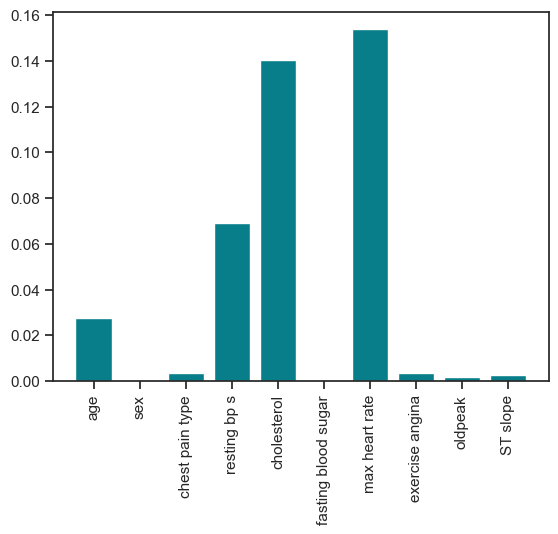

In [123]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## =================== SVM ==================

## Hyperparameter Tuning (GridSearchCV) (SVM)

In [124]:
clf = GridSearchCV(SVC(gamma='auto'), {
    'kernel': ['rbf', 'linear']
}, cv=5, return_train_score=False)

clf.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(gamma='auto'),
             param_grid={'kernel': ['rbf', 'linear']})

In [125]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.056175,0.003515,0.02259,0.001329,rbf,{'kernel': 'rbf'},0.533613,0.550420,0.907563,0.777311,0.949580,0.743697,0.174276,2
1,3.134146,0.519201,0.00394,0.000523,linear,{'kernel': 'linear'},0.857143,0.836134,0.861345,0.768908,0.789916,0.822689,0.036956,1


In [126]:
df[['params', 'mean_test_score']]

,params,mean_test_score
0,{'kernel': 'rbf'},0.743697
1,{'kernel': 'linear'},0.822689


In [127]:
clf.best_params_

{'kernel': 'linear'}

### Model Training (SVM)

In [128]:
svm = SVC(kernel='linear')

start = time.time()
svm.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['SVM']['Accuracy'] = f"{round((svm.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['SVM']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (SVM)

In [129]:
y_train_pred = svm.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  84%


In [130]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82       437
           1       0.86      0.84      0.85       515

    accuracy                           0.84       952
   macro avg       0.83      0.84      0.84       952
weighted avg       0.84      0.84      0.84       952



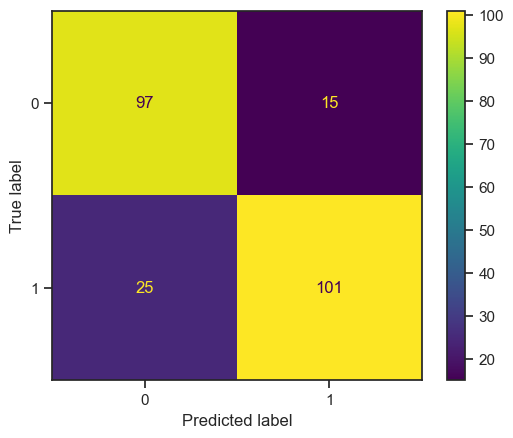

In [131]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.show()

### Testing Accuracy (SVM)

In [132]:
y_test_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  83%


In [133]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.87      0.80      0.83       122
           1       0.80      0.87      0.83       116

    accuracy                           0.83       238
   macro avg       0.83      0.83      0.83       238
weighted avg       0.83      0.83      0.83       238



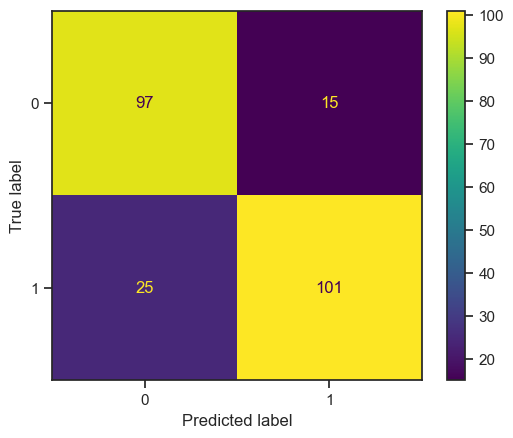

In [134]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(svm, X_test, y_test)
plt.show()

### Cross Validation (SVM)

#### ========== 10-fold cross validation ==========

In [135]:
start = time.time()
cross_val_acc = cross_val_score(estimator=svm, X=X, y=y, cv=10)
stop = time.time()

In [136]:
print(cross_val_acc*100)

[82.35294118 89.91596639 86.55462185 79.83193277 85.71428571 85.71428571
 80.67226891 76.47058824 79.83193277 78.1512605 ]


In [137]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  83%


In [138]:
ten_fold_cross_val_accuracies['SVM']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['SVM']['Training time'] = f"{round((stop - start), 3)}s"

In [139]:
ten_fold_cross_val_accuracies_plot['SVM'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [140]:
start = time.time()
cross_val_acc = cross_val_score(estimator=svm, X=X, y=y, cv=5)
stop = time.time()

In [141]:
print(cross_val_acc*100)

[85.71428571 83.61344538 86.13445378 76.8907563  78.99159664]


In [142]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  82%


In [143]:
five_fold_cross_val_accuracies['SVM']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['SVM']['Training time'] = f"{round((stop - start), 3)}s"

In [144]:
five_fold_cross_val_accuracies_plot['SVM'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (SVM)

In [145]:
results = permutation_importance(svm, X_test, y_test)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': results.importances_mean
})
importances

,Attribute,Importance
0,age,0.000840
1,sex,0.016807
2,chest pain type,0.034454
3,resting bp s,-0.003361
4,cholesterol,0.012605
5,fasting blood sugar,0.005042
6,max heart rate,-0.005042
7,exercise angina,0.041176
8,oldpeak,0.019328
9,ST slope,0.073109


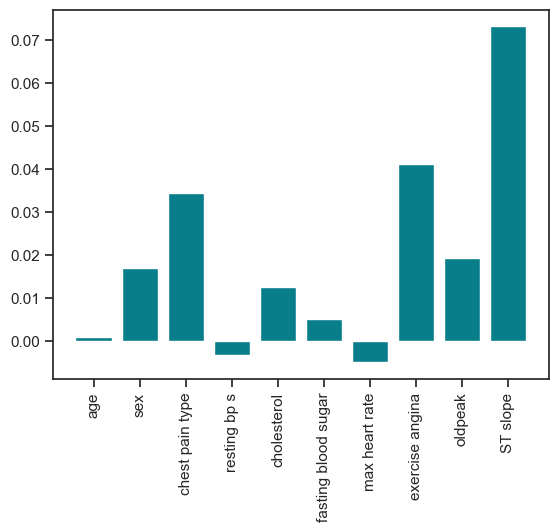

In [146]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## =================== Naive Bayes ==================

### Model Training (Naive Bayes)

In [147]:
nb = GaussianNB()

start = time.time()
nb.fit(X_train, y_train)
stop = time.time()

raw_model_accuracies['Naive Bayes']['Accuracy'] = f"{round((nb.score(X_test, y_test) * 100), 3)}%"
raw_model_accuracies['Naive Bayes']['Training time'] = f"{round((stop - start), 3)}s"

### Training Accuracy (Naive Bayes)

In [148]:
y_train_pred = nb.predict(X_train)
accuracy = accuracy_score(y_train_pred, y_train)
print('Training accuracy: ', "{:.0%}".format(accuracy))

Training accuracy:  84%


In [149]:
print(classification_report(y_train_pred,y_train))

              precision    recall  f1-score   support

           0       0.85      0.82      0.84       465
           1       0.83      0.86      0.85       487

    accuracy                           0.84       952
   macro avg       0.84      0.84      0.84       952
weighted avg       0.84      0.84      0.84       952



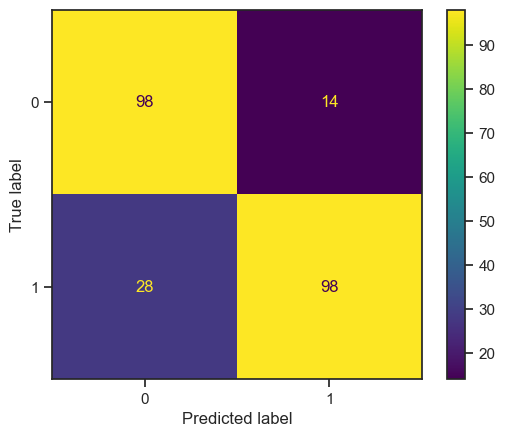

In [150]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()

### Testing Accuracy (Naive Bayes)

In [151]:
y_test_pred = nb.predict(X_test)
accuracy = accuracy_score(y_test_pred, y_test)
print('Testing accuracy: ', "{:.0%}".format(accuracy))

Testing accuracy:  82%


In [152]:
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.88      0.78      0.82       126
           1       0.78      0.88      0.82       112

    accuracy                           0.82       238
   macro avg       0.83      0.83      0.82       238
weighted avg       0.83      0.82      0.82       238



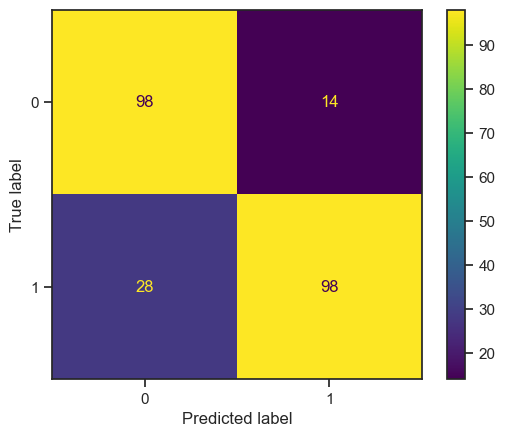

In [153]:
sns.set(style="ticks")
ConfusionMatrixDisplay.from_estimator(nb, X_test, y_test)
plt.show()

### Cross Validation (Naive Bayes)

#### ========== 10-fold cross validation ==========

In [154]:
start = time.time()
cross_val_acc = cross_val_score(estimator=nb, X=X, y=y, cv=10)
stop = time.time()

In [155]:
print(cross_val_acc*100)

[81.51260504 90.75630252 93.27731092 75.6302521  88.23529412 86.55462185
 78.1512605  78.99159664 77.31092437 80.67226891]


In [156]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  83%


In [157]:
ten_fold_cross_val_accuracies['Naive Bayes']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
ten_fold_cross_val_accuracies['Naive Bayes']['Training time'] = f"{round((stop - start), 3)}s"

In [158]:
ten_fold_cross_val_accuracies_plot['Naive Bayes'] = round((cross_val_acc.mean() * 100), 3)

#### ========== 5-fold cross validation ==========

In [159]:
start = time.time()
cross_val_acc = cross_val_score(estimator=nb, X=X, y=y, cv=5)
stop = time.time()

In [160]:
print(cross_val_acc*100)

[85.71428571 85.29411765 88.23529412 76.8907563  77.73109244]


In [161]:
print('Accuracy: ', "{:.0%}".format(cross_val_acc.mean()))

Accuracy:  83%


In [162]:
five_fold_cross_val_accuracies['Naive Bayes']['Accuracy'] = f"{round((cross_val_acc.mean() * 100), 3)}%"
five_fold_cross_val_accuracies['Naive Bayes']['Training time'] = f"{round((stop - start), 3)}s"

In [163]:
five_fold_cross_val_accuracies_plot['Naive Bayes'] = round((cross_val_acc.mean() * 100), 3)

### Feature Importance (Naive Bayes)

In [164]:
results = permutation_importance(nb, X_test, y_test)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': results.importances_mean
})
importances

,Attribute,Importance
0,age,8.403361e-03
1,sex,1.428571e-02
2,chest pain type,2.268908e-02
3,resting bp s,-2.220446e-17
4,cholesterol,1.764706e-02
5,fasting blood sugar,-2.220446e-17
6,max heart rate,5.042017e-03
7,exercise angina,2.100840e-02
8,oldpeak,2.521008e-02
9,ST slope,2.605042e-02


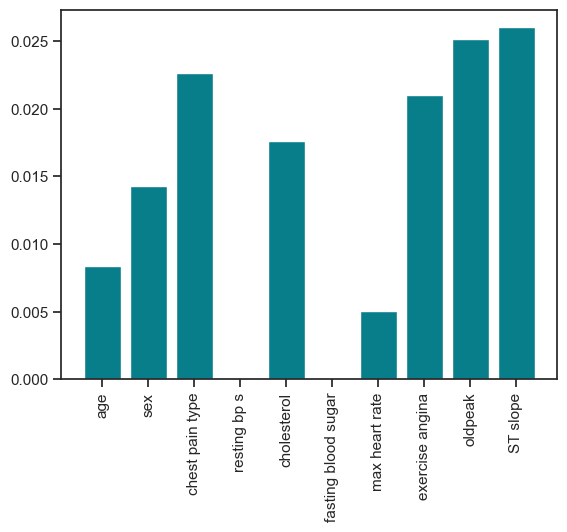

In [165]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.xticks(rotation='vertical')
plt.show()

## Comparing Models (Version 1)

In [166]:
raw_model_accuracies

{'Logistic Regression': {'Accuracy': '82.353%', 'Training time': '0.058s'},
 'Random Forest': {'Accuracy': '92.437%', 'Training time': '0.911s'},
 'Decision Tree': {'Accuracy': '89.076%', 'Training time': '0.004s'},
 'KNN': {'Accuracy': '74.37%', 'Training time': '0.002s'},
 'SVM': {'Accuracy': '83.193%', 'Training time': '2.178s'},
 'Naive Bayes': {'Accuracy': '82.353%', 'Training time': '0.003s'}}

In [167]:
ten_fold_cross_val_accuracies

{'Logistic Regression': {'Accuracy': '82.017%', 'Training time': '0.716s'},
 'Random Forest': {'Accuracy': '93.361%', 'Training time': '8.901s'},
 'Decision Tree': {'Accuracy': '88.655%', 'Training time': '0.036s'},
 'KNN': {'Accuracy': '70.168%', 'Training time': '0.069s'},
 'SVM': {'Accuracy': '82.521%', 'Training time': '36.866s'},
 'Naive Bayes': {'Accuracy': '83.109%', 'Training time': '0.034s'}}

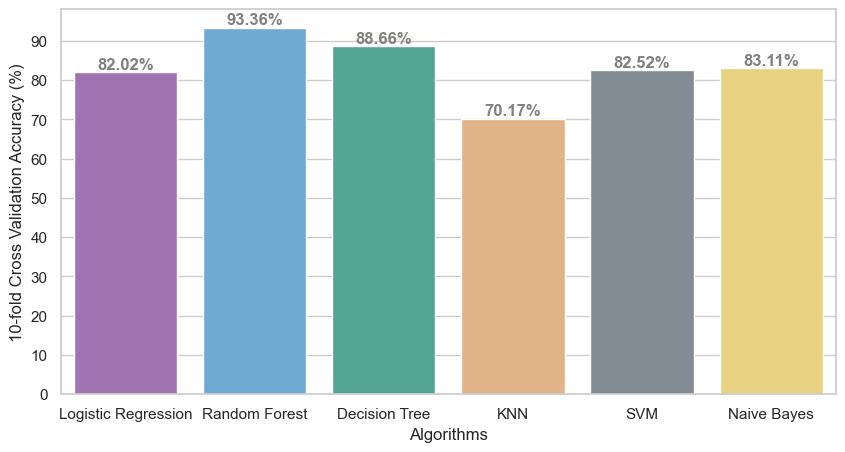

In [168]:
# Your data and styling
colors = ["#A569BD", "#5DADE2", "#45B39D", "#F0B27A", "#808B96", "#F7DC6F"]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("10-fold Cross Validation Accuracy (%)")
plt.xlabel("Algorithms")

# Your barplot
ax = sns.barplot(x=list(ten_fold_cross_val_accuracies_plot.keys()), y=list(ten_fold_cross_val_accuracies_plot.values()), palette=colors)

# Add percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, height
    ax.annotate(f'{height:.2f}%', (x, y), ha='center', va='bottom', fontsize=12, color='gray', weight='bold')

plt.savefig('./plots/10-fold-accuracy.png', bbox_inches='tight', dpi=150)
plt.show()

In [169]:
five_fold_cross_val_accuracies

{'Logistic Regression': {'Accuracy': '81.933%', 'Training time': '0.334s'},
 'Random Forest': {'Accuracy': '93.193%', 'Training time': '4.356s'},
 'Decision Tree': {'Accuracy': '87.059%', 'Training time': '0.021s'},
 'KNN': {'Accuracy': '70.588%', 'Training time': '0.048s'},
 'SVM': {'Accuracy': '82.269%', 'Training time': '15.717s'},
 'Naive Bayes': {'Accuracy': '82.773%', 'Training time': '0.022s'}}

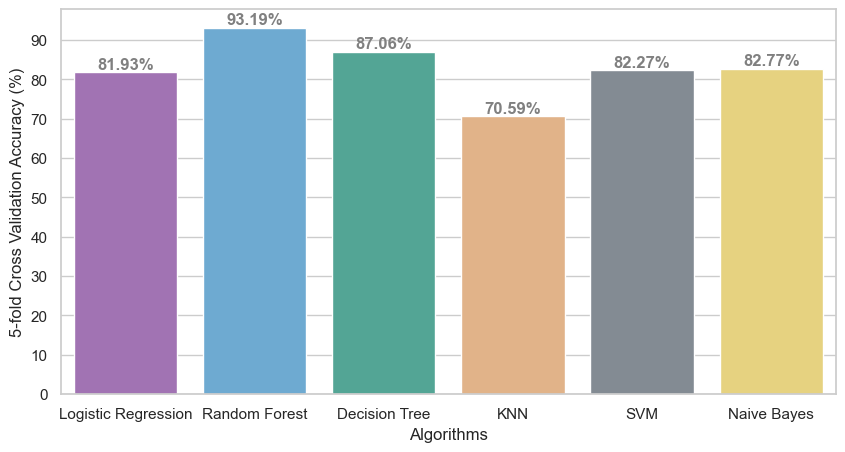

In [170]:
# Your data and styling
colors = ["#A569BD", "#5DADE2", "#45B39D", "#F0B27A", "#808B96", "#F7DC6F"]
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))
plt.yticks(np.arange(0, 100, 10))
plt.ylabel("5-fold Cross Validation Accuracy (%)")
plt.xlabel("Algorithms")

# Your barplot
ax = sns.barplot(x=list(five_fold_cross_val_accuracies_plot.keys()), y=list(five_fold_cross_val_accuracies_plot.values()), palette=colors)

# Add percentage labels inside the bars
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_x() + width / 2, height
    ax.annotate(f'{height:.2f}%', (x, y), ha='center', va='bottom', fontsize=12, color='gray', weight='bold')

plt.show()

# ROC Curve

In [171]:
r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr.predict_proba(X_test)
rf_probs = rf.predict_proba(X_test)
dtc_probs = dtc.predict_proba(X_test)
knn_probs = knn.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

In [172]:
lr_probs = lr_probs[:, 1]
rf_probs = rf_probs[:, 1]
dtc_probs = dtc_probs[:, 1]
knn_probs = knn_probs[:, 1]
nb_probs = nb_probs[:, 1]

In [173]:
r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, nb_probs)
dtc_auc = roc_auc_score(y_test, nb_probs)
knn_auc = roc_auc_score(y_test, nb_probs)
nb_auc = roc_auc_score(y_test, nb_probs)

In [174]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Logistic Regression: AUROC = %.3f' % (lr_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Decision Tree: AUROC = %.3f' % (dtc_auc))
print('KNN: AUROC = %.3f' % (knn_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Logistic Regression: AUROC = 0.969
Random Forest: AUROC = 0.901
Decision Tree: AUROC = 0.901
KNN: AUROC = 0.901
Naive Bayes: AUROC = 0.901


In [175]:
r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
dtc_fpr, dtc_tpr, _ = roc_curve(y_test, dtc_probs)
knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)

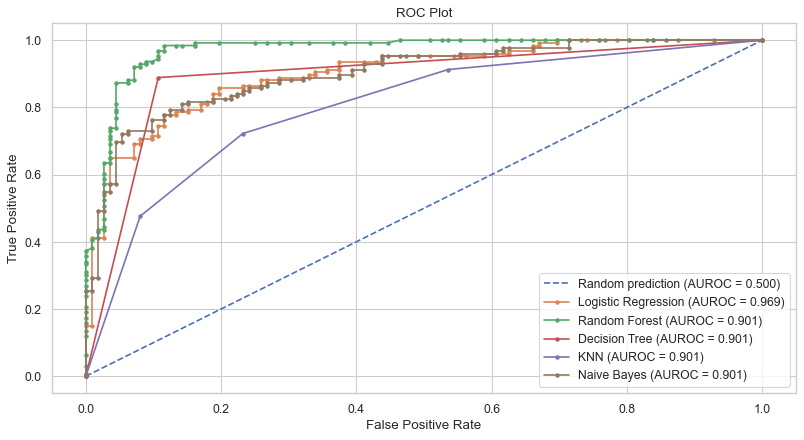

In [176]:
# figure size
figure(figsize=(12, 6), dpi=80)

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic Regression (AUROC = %0.3f)' % lr_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(dtc_fpr, dtc_tpr, marker='.', label='Decision Tree (AUROC = %0.3f)' % dtc_auc)
plt.plot(knn_fpr, knn_tpr, marker='.', label='KNN (AUROC = %0.3f)' % knn_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() 

# Save plot
plt.savefig('./plots/roc-auc.png', bbox_inches='tight', dpi=150)

# Show plot
plt.show()